In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
%matplotlib inline

### Dataset

In [2]:
# Carregando o dataset
car_price = pd.read_csv("CarPrice_Assignment.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Visualizando informações do dataset
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Estatísticas das variáveis numéricas
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


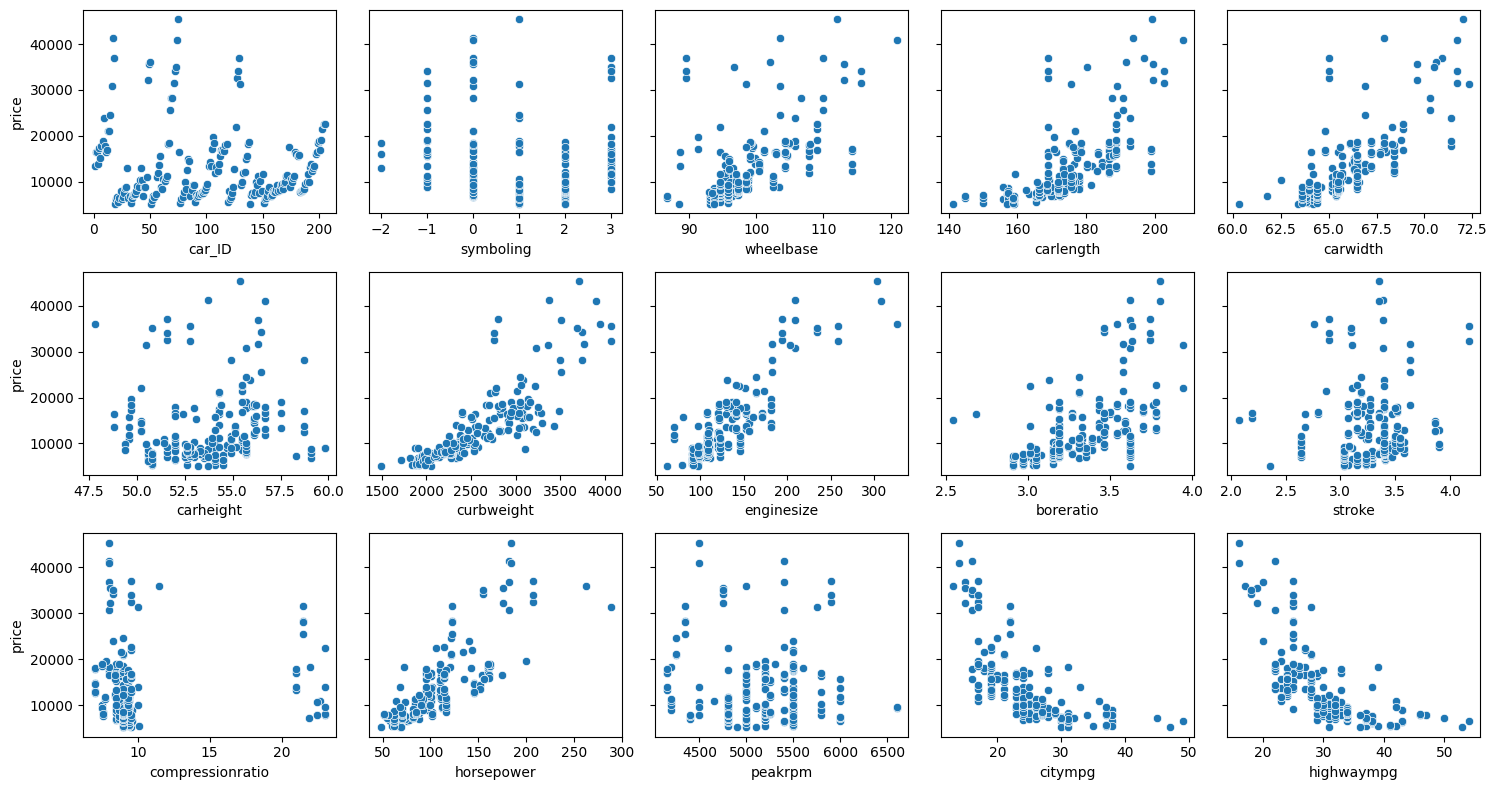

In [5]:
# Analisando correlação entre as variáveis numéricas e a variável target
fig, axes = plt.subplots(ncols=5, nrows=3, sharey=True, figsize=(15, 8))
axes = axes.flatten()
num_cols = car_price.select_dtypes("number").columns[:-1]

for col, ax in zip(num_cols, axes):
    sns.scatterplot(data=car_price, x=col, y="price", ax=ax)
fig.tight_layout()

In [6]:
# Variáveis regressoras
X = car_price.iloc[:, 1:-1].drop("CarName", axis=1)

# Variável target
y = car_price.iloc[:,-1]

# Tranformando variáveis categóricas
X = pd.get_dummies(X)

# Normalizando os dados numericos
num_cols = X.select_dtypes("number").columns
X[num_cols] = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=num_cols)

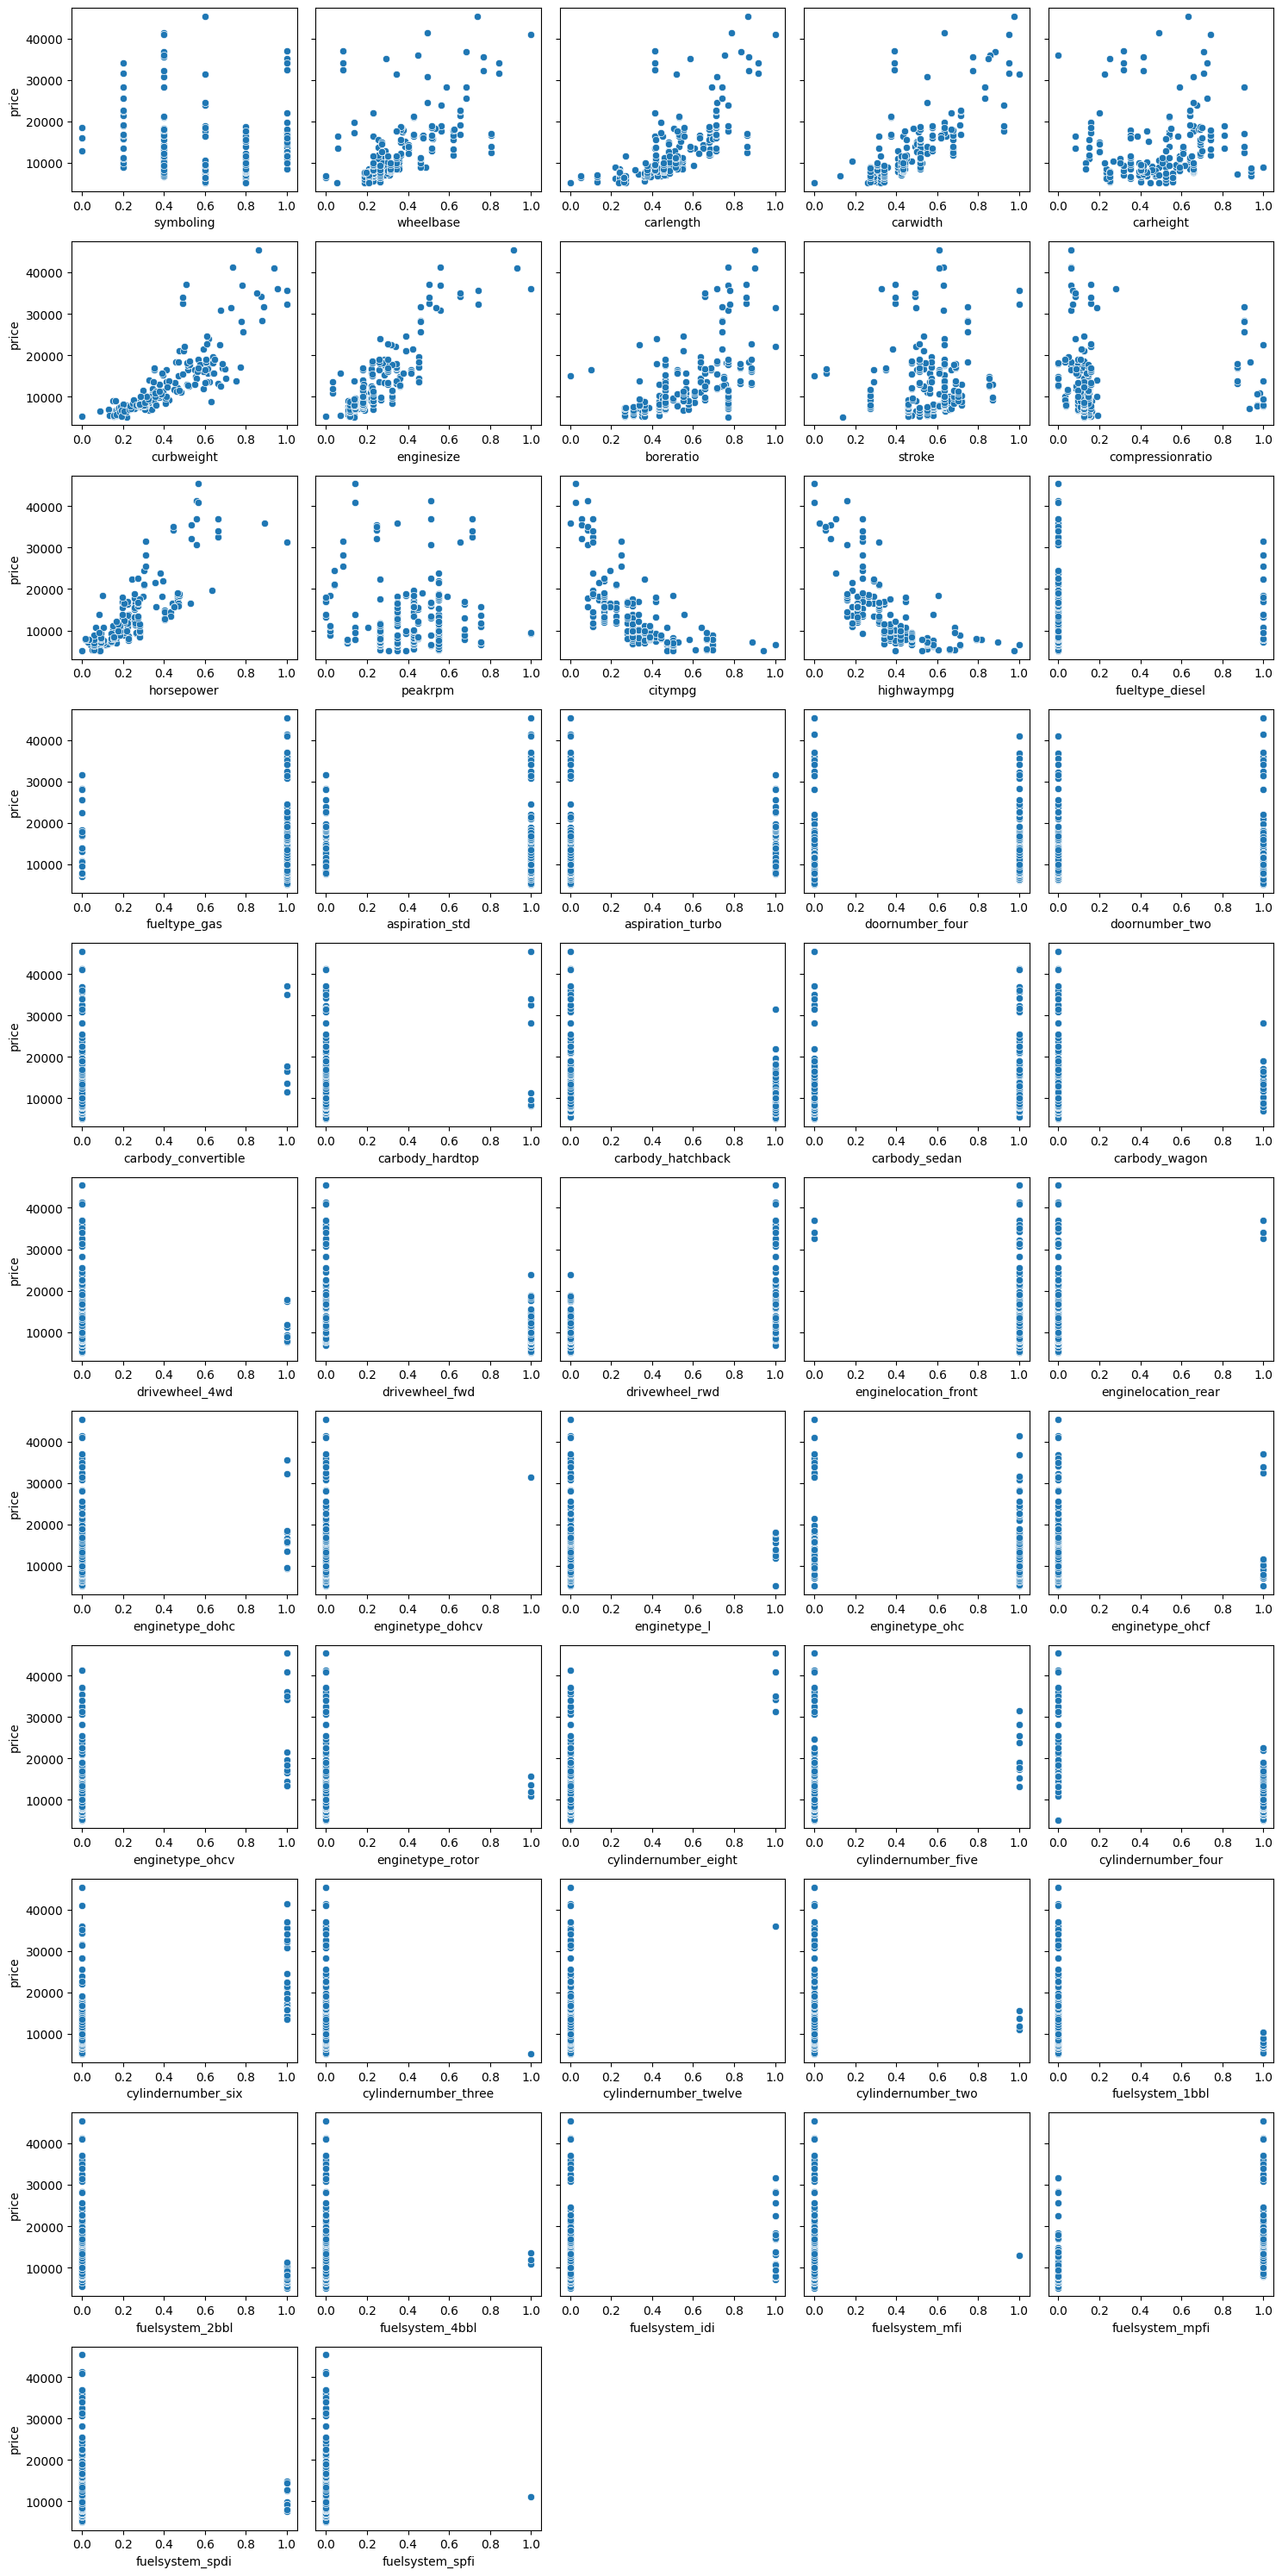

In [7]:
# Analisando a relação das variáveis com o target após dummyficação e normalização
fig, axes = plt.subplots(ncols=5, nrows=11, sharey=True, figsize=(15, 30))
axes = axes.flatten()

i = 0
for i, ax in zip(range(55), axes):
    if i < len(X.columns):
        sns.scatterplot(x=X.iloc[:, i], y=car_price["price"], ax=ax)
    else:
        ax.set_axis_off()
    
    i += 1
fig.tight_layout()

### OLS

In [8]:
# Regressão via OLS
def ols_formula(X, y, *exclude):
    cols = list(X.columns)
    for col in exclude:
        cols.remove(col)
    return y.name + ' ~ ' + ' + '.join(cols)

reg = smf.ols(ols_formula(X, y), pd.concat([X, y], axis=1)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     61.79
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           4.86e-80
Time:                        21:00:13   Log-Likelihood:                -1844.9
No. Observations:                 205   AIC:                             3774.
Df Residuals:                     163   BIC:                             3913.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2793.91

In [9]:
cols2drop = list(reg.pvalues[reg.pvalues > 0.1].keys())
reg = smf.ols(ols_formula(X, y, *cols2drop), pd.concat([X, y], axis=1)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           3.81e-94
Time:                        21:00:13   Log-Likelihood:                -1861.9
No. Observations:                 205   AIC:                             3766.
Df Residuals:                     184   BIC:                             3836.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3502.8373 

In [10]:
cols2drop += list(reg.pvalues[reg.pvalues > 0.1].keys())
reg = smf.ols(ols_formula(X, y, *cols2drop), pd.concat([X, y], axis=1)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     138.9
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           2.92e-96
Time:                        21:00:13   Log-Likelihood:                -1864.7
No. Observations:                 205   AIC:                             3765.
Df Residuals:                     187   BIC:                             3825.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4248.5252 

### Scikit-Learn

In [11]:
# Separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Treinando o modelo LinearRegression do modulo linear_model do sklearn
lin_reg = LinearRegression().fit(X_train, y_train)

In [12]:
# Fazendo previsões
y_pred = lin_reg.predict(X_test)

# Verificando as métricas
print(f"R² = {lin_reg.score(X_test, y_test)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")
print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"RMSE = {mean_squared_error(y_test, y_pred) ** (1/2)}")

R² = 0.8724753693217407
MAE = 2244.6017256584473
MSE = 10067307.106935134
RMSE = 3172.902000840104


D:\Programas\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variável Predita x Variável de Teste')

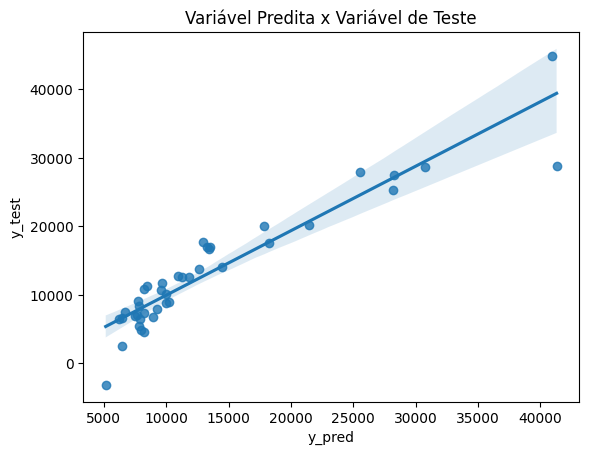

In [13]:
# Plot das variáveis preditas e variáveis de teste
fig, ax = plt.subplots()
sns.regplot(y_test, y_pred)
ax.set_xlabel("y_pred")
ax.set_ylabel("y_test")
ax.set_title("Variável Predita x Variável de Teste")

In [14]:
# Desconsiderando as variáveis em cols2drop
X_reg = X[X.columns.drop(cols2drop)]

# Separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_reg, y, random_state=42)

In [15]:
# Treinando o modelo LinearRegression do modulo linear_model do sklearn
lin_reg = LinearRegression().fit(X_train, y_train)

In [16]:
# Fazendo previsões
y_pred = lin_reg.predict(X_test)

# Verificando as métricas
print(f"R² = {lin_reg.score(X_test, y_test)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")
print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"RMSE = {mean_squared_error(y_test, y_pred) ** (1/2)}")

R² = 0.8816217097599977
MAE = 1918.0615516180974
MSE = 8009420.294456283
RMSE = 2830.0919233226828


D:\Programas\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


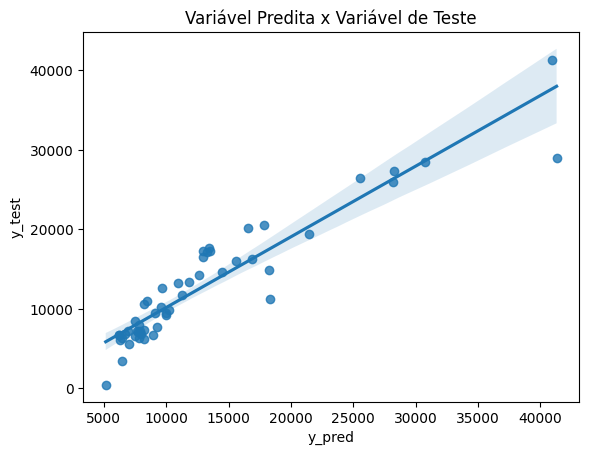

In [17]:
# Plot das variáveis preditas e variáveis de teste
fig, ax = plt.subplots()
sns.regplot(y_test, y_pred)
ax.set_xlabel("y_pred")
ax.set_ylabel("y_test")
ax.set_title("Variável Predita x Variável de Teste");